In [141]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from torchvision import datasets
import os
from itertools import chain, product
import seaborn as sn

from development import data_handler


## Read Data

In [142]:
df_quest_meta = pd.read_excel("../data/survey_results/question_meta_data.xlsx")

In [143]:
DATA_PATH = "../data/survey_results/data_tu-helpfulness-of-xai_2022-06-29_10-48.xlsx"
DATA_PREPARED_PATH = f"{DATA_PATH.rsplit('.',1)[0]}_PREPARED.{DATA_PATH.rsplit('.',1)[1]}"
df = pd.read_excel(DATA_PATH)
df_merged = pd.read_excel(DATA_PREPARED_PATH)

# Analysis

In [144]:
df_merged

,Unnamed: 0,case,Education,Education: Other,ML Experience,ML Experience Usefulness,Color Blindness,Color Blindness: Yes,Visual Impairment Affect,Feedback Form: [01],QUESTNNR,TIME003,question_code,response,label,img_idx,model,method,is_pred_correct
0,0,579,Highschool,NaN,Not at all,NaN,No,NaN,NaN,NaN,bogen7,111,B715,False,chiffonier,4389,alex,SHAP,True
1,210,579,Highschool,NaN,Not at all,NaN,No,NaN,NaN,NaN,bogen7,111,B702,False,matchstick,6063,vgg,ConfidenceScores,False
2,200,579,Highschool,NaN,Not at all,NaN,No,NaN,NaN,NaN,bogen7,111,B703,True,gyromitra,9931,alex,LIME,True
3,30,579,Highschool,NaN,Not at all,NaN,No,NaN,NaN,NaN,bogen7,111,B718,False,trifle,9200,alex,ConfidenceScores,False
4,190,579,Highschool,NaN,Not at all,NaN,No,NaN,NaN,NaN,bogen7,111,B704,False,Boston_bull,1073,alex,SHAP,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3259,2219,1660,Postgraduate,NaN,Between 1 and 3 years,Somewhat helpful,No,NaN,NaN,NaN,bogen8,129,B817,True,red-breasted_merganser,9788,alex,ConfidenceScores,False
3260,2327,1660,Postgraduate,NaN,Between 1 and 3 years,Somewhat helpful,No,NaN,NaN,NaN,bogen8,129,B801,False,custard_apple,9521,alex,SHAP,True
3261,2207,1660,Postgraduate,NaN,Between 1 and 3 years,Somewhat helpful,No,NaN,NaN,NaN,bogen8,129,B822,False,shovel,7702,vgg,gradCAM,False
3262,2159,1660,Postgraduate,NaN,Between 1 and 3 years,Somewhat helpful,No,NaN,NaN,NaN,bogen8,129,B810,False,coral_reef,9710,vgg,SHAP,True


## Confusion Matrices

### Overall all confusion matrix

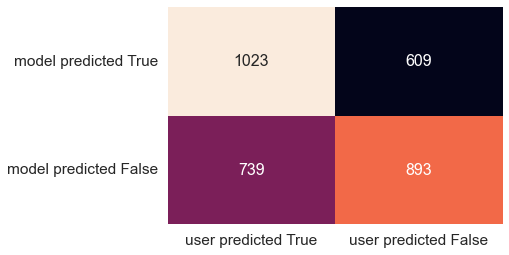

Accuracy is 0.5870098039215687


In [145]:
TP = df_merged[(df_merged["is_pred_correct"] == True) & (df_merged["response"] == True)]
TN = df_merged[(df_merged["is_pred_correct"] == False) & (df_merged["response"] == False)]
FN = df_merged[(df_merged["is_pred_correct"] == True) & (df_merged["response"] == False)]
FP = df_merged[(df_merged["is_pred_correct"] == False) & (df_merged["response"] == True)]

cm = np.array([[len(TP),len(FN)],[len(FP),len(TN)]])
cm = pd.DataFrame(cm, index=["model predicted True", "model predicted False"],
                  columns=["user predicted True", "user predicted False"])
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 16},cbar=False,fmt="g") # font size

plt.show()
acc = (len(TP)+len(TN))/(len(TP)+len(TN)+len(FP)+len(FN))
print("Accuracy is",str(acc))

### Model wise confusion matrix

#### VGG

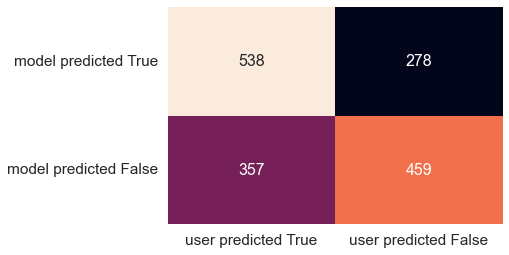

Accuracy is 0.6109068627450981


In [146]:
tmp = df_merged[df_merged["model"]=="vgg"]
TP = tmp[(tmp["is_pred_correct"] == True) & (tmp["response"] == True)]
TN = tmp[(tmp["is_pred_correct"] == False) & (tmp["response"] == False)]
FN = tmp[(tmp["is_pred_correct"] == True) & (tmp["response"] == False)]
FP = tmp[(tmp["is_pred_correct"] == False) & (tmp["response"] == True)]

cm = np.array([[len(TP),len(FN)],[len(FP),len(TN)]])
cm = pd.DataFrame(cm, index=["model predicted True", "model predicted False"],
                  columns=["user predicted True", "user predicted False"])
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 16},cbar=False,fmt="g") # font size

plt.show()
acc = (len(TP)+len(TN))/(len(TP)+len(TN)+len(FP)+len(FN))
print("Accuracy is",str(acc))

#### AlexNet

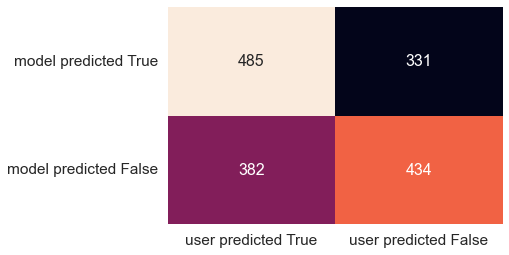

Accuracy is 0.5631127450980392


In [147]:
tmp = df_merged[df_merged["model"]=="alex"]
TP = tmp[(tmp["is_pred_correct"] == True) & (tmp["response"] == True)]
TN = tmp[(tmp["is_pred_correct"] == False) & (tmp["response"] == False)]
FN = tmp[(tmp["is_pred_correct"] == True) & (tmp["response"] == False)]
FP = tmp[(tmp["is_pred_correct"] == False) & (tmp["response"] == True)]

cm = np.array([[len(TP),len(FN)],[len(FP),len(TN)]])
cm = pd.DataFrame(cm, index=["model predicted True", "model predicted False"],
                  columns=["user predicted True", "user predicted False"])
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 16},cbar=False,fmt="g") # font size

plt.show()
acc = (len(TP)+len(TN))/(len(TP)+len(TN)+len(FP)+len(FN))
print("Accuracy is",str(acc))

### Method wise

#### LRP

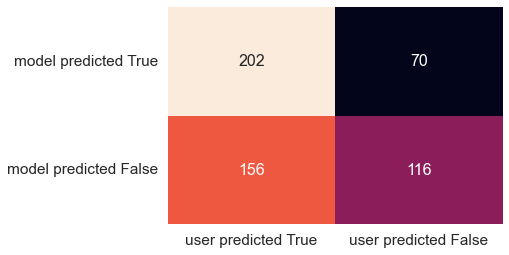

Accuracy is 0.5845588235294118


In [148]:
tmp = df_merged[df_merged["method"]=="LRP"]
TP = tmp[(tmp["is_pred_correct"] == True) & (tmp["response"] == True)]
TN = tmp[(tmp["is_pred_correct"] == False) & (tmp["response"] == False)]
FN = tmp[(tmp["is_pred_correct"] == True) & (tmp["response"] == False)]
FP = tmp[(tmp["is_pred_correct"] == False) & (tmp["response"] == True)]

cm = np.array([[len(TP),len(FN)],[len(FP),len(TN)]])
cm = pd.DataFrame(cm, index=["model predicted True", "model predicted False"],
                  columns=["user predicted True", "user predicted False"])
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 16},cbar=False,fmt="g") # font size

plt.show()
acc = (len(TP)+len(TN))/(len(TP)+len(TN)+len(FP)+len(FN))
print("Accuracy is",str(acc))

#### gradcam

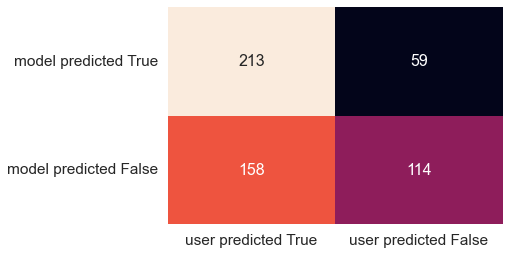

Accuracy is 0.6011029411764706


In [149]:
tmp = df_merged[df_merged["method"]=="gradCAM"]
TP = tmp[(tmp["is_pred_correct"] == True) & (tmp["response"] == True)]
TN = tmp[(tmp["is_pred_correct"] == False) & (tmp["response"] == False)]
FN = tmp[(tmp["is_pred_correct"] == True) & (tmp["response"] == False)]
FP = tmp[(tmp["is_pred_correct"] == False) & (tmp["response"] == True)]

cm = np.array([[len(TP),len(FN)],[len(FP),len(TN)]])
cm = pd.DataFrame(cm, index=["model predicted True", "model predicted False"],
                  columns=["user predicted True", "user predicted False"])
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 16},cbar=False,fmt="g") # font size

plt.show()
acc = (len(TP)+len(TN))/(len(TP)+len(TN)+len(FP)+len(FN))
print("Accuracy is",str(acc))

#### LIME

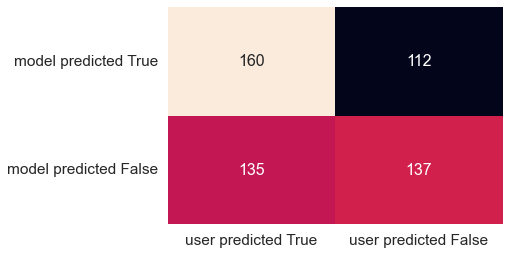

Accuracy is 0.5459558823529411


In [150]:
tmp = df_merged[df_merged["method"]=="LIME"]
TP = tmp[(tmp["is_pred_correct"] == True) & (tmp["response"] == True)]
TN = tmp[(tmp["is_pred_correct"] == False) & (tmp["response"] == False)]
FN = tmp[(tmp["is_pred_correct"] == True) & (tmp["response"] == False)]
FP = tmp[(tmp["is_pred_correct"] == False) & (tmp["response"] == True)]

cm = np.array([[len(TP),len(FN)],[len(FP),len(TN)]])
cm = pd.DataFrame(cm, index=["model predicted True", "model predicted False"],
                  columns=["user predicted True", "user predicted False"])
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 16},cbar=False,fmt="g") # font size

plt.show()
acc = (len(TP)+len(TN))/(len(TP)+len(TN)+len(FP)+len(FN))
print("Accuracy is",str(acc))

#### SHAP

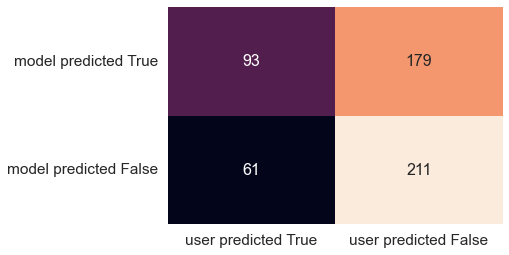

Accuracy is 0.5588235294117647


In [151]:
tmp = df_merged[df_merged["method"]=="SHAP"]
TP = tmp[(tmp["is_pred_correct"] == True) & (tmp["response"] == True)]
TN = tmp[(tmp["is_pred_correct"] == False) & (tmp["response"] == False)]
FN = tmp[(tmp["is_pred_correct"] == True) & (tmp["response"] == False)]
FP = tmp[(tmp["is_pred_correct"] == False) & (tmp["response"] == True)]

cm = np.array([[len(TP),len(FN)],[len(FP),len(TN)]])
cm = pd.DataFrame(cm, index=["model predicted True", "model predicted False"],
                  columns=["user predicted True", "user predicted False"])
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 16},cbar=False,fmt="g") # font size

plt.show()
acc = (len(TP)+len(TN))/(len(TP)+len(TN)+len(FP)+len(FN))
print("Accuracy is",str(acc))

#### ConfidenceScores

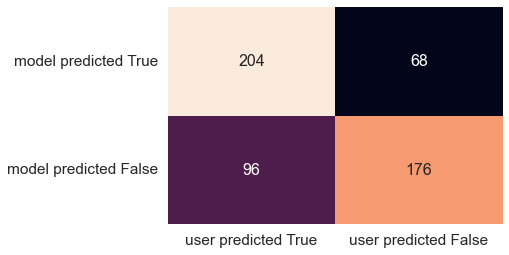

Accuracy is 0.6985294117647058


In [152]:
tmp = df_merged[df_merged["method"]=="ConfidenceScores"]
TP = tmp[(tmp["is_pred_correct"] == True) & (tmp["response"] == True)]
TN = tmp[(tmp["is_pred_correct"] == False) & (tmp["response"] == False)]
FN = tmp[(tmp["is_pred_correct"] == True) & (tmp["response"] == False)]
FP = tmp[(tmp["is_pred_correct"] == False) & (tmp["response"] == True)]

cm = np.array([[len(TP),len(FN)],[len(FP),len(TN)]])
cm = pd.DataFrame(cm, index=["model predicted True", "model predicted False"],
                  columns=["user predicted True", "user predicted False"])
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 16},cbar=False,fmt="g") # font size

plt.show()
acc = (len(TP)+len(TN))/(len(TP)+len(TN)+len(FP)+len(FN))
print("Accuracy is",str(acc))

#### IntegratedGradients

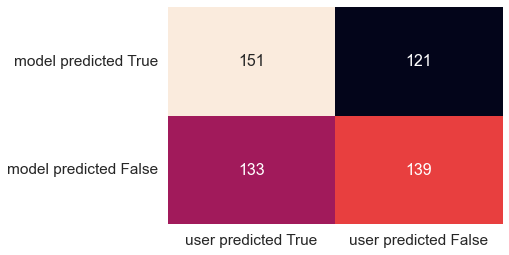

Accuracy is 0.5330882352941176


In [153]:
tmp = df_merged[df_merged["method"]=="IntegratedGradients"]
TP = tmp[(tmp["is_pred_correct"] == True) & (tmp["response"] == True)]
TN = tmp[(tmp["is_pred_correct"] == False) & (tmp["response"] == False)]
FN = tmp[(tmp["is_pred_correct"] == True) & (tmp["response"] == False)]
FP = tmp[(tmp["is_pred_correct"] == False) & (tmp["response"] == True)]

cm = np.array([[len(TP),len(FN)],[len(FP),len(TN)]])
cm = pd.DataFrame(cm, index=["model predicted True", "model predicted False"],
                  columns=["user predicted True", "user predicted False"])
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 16},cbar=False,fmt="g") # font size

plt.show()
acc = (len(TP)+len(TN))/(len(TP)+len(TN)+len(FP)+len(FN))
print("Accuracy is",str(acc))

### questionnaire wise

#### questionnaire 1

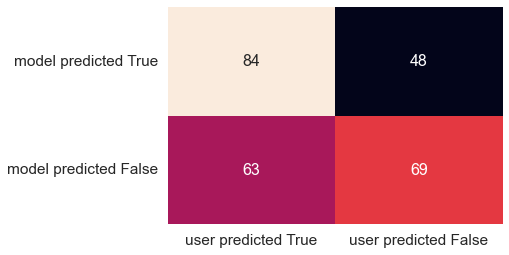

Accuracy is 0.5795454545454546


In [154]:
tmp = df_merged[df_merged["question_code"].apply(lambda x: "B1" in x)]
TP = tmp[(tmp["is_pred_correct"] == True) & (tmp["response"] == True)]
TN = tmp[(tmp["is_pred_correct"] == False) & (tmp["response"] == False)]
FN = tmp[(tmp["is_pred_correct"] == True) & (tmp["response"] == False)]
FP = tmp[(tmp["is_pred_correct"] == False) & (tmp["response"] == True)]

cm = np.array([[len(TP),len(FN)],[len(FP),len(TN)]])
cm = pd.DataFrame(cm, index=["model predicted True", "model predicted False"],
                  columns=["user predicted True", "user predicted False"])
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 16},cbar=False,fmt="g") # font size

plt.show()
acc = (len(TP)+len(TN))/(len(TP)+len(TN)+len(FP)+len(FN))
print("Accuracy is",str(acc))

#### questionnaire 2

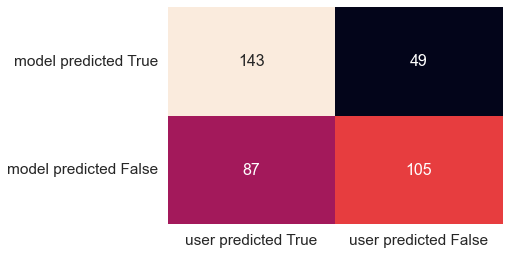

Accuracy is 0.6458333333333334


In [155]:
tmp = df_merged[df_merged["question_code"].apply(lambda x: "B2" in x)]
TP = tmp[(tmp["is_pred_correct"] == True) & (tmp["response"] == True)]
TN = tmp[(tmp["is_pred_correct"] == False) & (tmp["response"] == False)]
FN = tmp[(tmp["is_pred_correct"] == True) & (tmp["response"] == False)]
FP = tmp[(tmp["is_pred_correct"] == False) & (tmp["response"] == True)]

cm = np.array([[len(TP),len(FN)],[len(FP),len(TN)]])
cm = pd.DataFrame(cm, index=["model predicted True", "model predicted False"],
                  columns=["user predicted True", "user predicted False"])
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 16},cbar=False,fmt="g") # font size

plt.show()
acc = (len(TP)+len(TN))/(len(TP)+len(TN)+len(FP)+len(FN))
print("Accuracy is",str(acc))

#### questionnaire 3

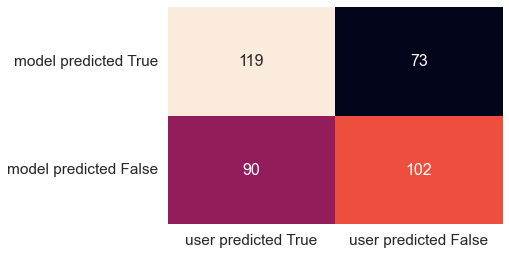

Accuracy is 0.5755208333333334


In [156]:
tmp = df_merged[df_merged["question_code"].apply(lambda x: "B3" in x)]
TP = tmp[(tmp["is_pred_correct"] == True) & (tmp["response"] == True)]
TN = tmp[(tmp["is_pred_correct"] == False) & (tmp["response"] == False)]
FN = tmp[(tmp["is_pred_correct"] == True) & (tmp["response"] == False)]
FP = tmp[(tmp["is_pred_correct"] == False) & (tmp["response"] == True)]

cm = np.array([[len(TP),len(FN)],[len(FP),len(TN)]])
cm = pd.DataFrame(cm, index=["model predicted True", "model predicted False"],
                  columns=["user predicted True", "user predicted False"])
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 16},cbar=False,fmt="g") # font size

plt.show()
acc = (len(TP)+len(TN))/(len(TP)+len(TN)+len(FP)+len(FN))
print("Accuracy is",str(acc))

#### questionnaire 4

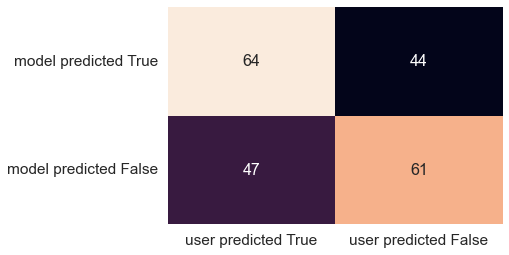

Accuracy is 0.5787037037037037


In [157]:
tmp = df_merged[df_merged["question_code"].apply(lambda x: "B4" in x)]
TP = tmp[(tmp["is_pred_correct"] == True) & (tmp["response"] == True)]
TN = tmp[(tmp["is_pred_correct"] == False) & (tmp["response"] == False)]
FN = tmp[(tmp["is_pred_correct"] == True) & (tmp["response"] == False)]
FP = tmp[(tmp["is_pred_correct"] == False) & (tmp["response"] == True)]

cm = np.array([[len(TP),len(FN)],[len(FP),len(TN)]])
cm = pd.DataFrame(cm, index=["model predicted True", "model predicted False"],
                  columns=["user predicted True", "user predicted False"])
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 16},cbar=False,fmt="g") # font size

plt.show()
acc = (len(TP)+len(TN))/(len(TP)+len(TN)+len(FP)+len(FN))
print("Accuracy is",str(acc))

#### questionnaire 5

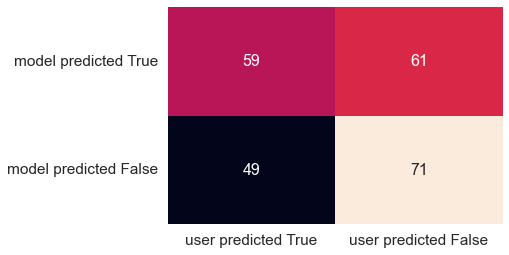

Accuracy is 0.5416666666666666


In [158]:
tmp = df_merged[df_merged["question_code"].apply(lambda x: "B5" in x)]
TP = tmp[(tmp["is_pred_correct"] == True) & (tmp["response"] == True)]
TN = tmp[(tmp["is_pred_correct"] == False) & (tmp["response"] == False)]
FN = tmp[(tmp["is_pred_correct"] == True) & (tmp["response"] == False)]
FP = tmp[(tmp["is_pred_correct"] == False) & (tmp["response"] == True)]

cm = np.array([[len(TP),len(FN)],[len(FP),len(TN)]])
cm = pd.DataFrame(cm, index=["model predicted True", "model predicted False"],
                  columns=["user predicted True", "user predicted False"])
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 16},cbar=False,fmt="g") # font size

plt.show()
acc = (len(TP)+len(TN))/(len(TP)+len(TN)+len(FP)+len(FN))
print("Accuracy is",str(acc))

#### questionnaire 6

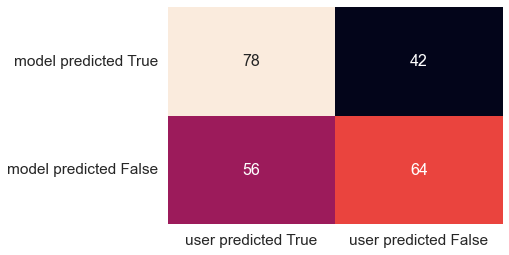

Accuracy is 0.5916666666666667


In [159]:
tmp = df_merged[df_merged["question_code"].apply(lambda x: "B6" in x)]
TP = tmp[(tmp["is_pred_correct"] == True) & (tmp["response"] == True)]
TN = tmp[(tmp["is_pred_correct"] == False) & (tmp["response"] == False)]
FN = tmp[(tmp["is_pred_correct"] == True) & (tmp["response"] == False)]
FP = tmp[(tmp["is_pred_correct"] == False) & (tmp["response"] == True)]

cm = np.array([[len(TP),len(FN)],[len(FP),len(TN)]])
cm = pd.DataFrame(cm, index=["model predicted True", "model predicted False"],
                  columns=["user predicted True", "user predicted False"])
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 16},cbar=False,fmt="g") # font size

plt.show()
acc = (len(TP)+len(TN))/(len(TP)+len(TN)+len(FP)+len(FN))
print("Accuracy is",str(acc))

#### questionnaire 7

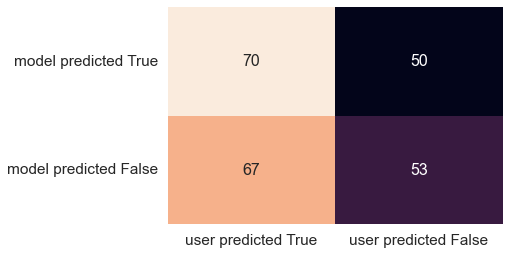

Accuracy is 0.5125


In [160]:
tmp = df_merged[df_merged["question_code"].apply(lambda x: "B7" in x)]
TP = tmp[(tmp["is_pred_correct"] == True) & (tmp["response"] == True)]
TN = tmp[(tmp["is_pred_correct"] == False) & (tmp["response"] == False)]
FN = tmp[(tmp["is_pred_correct"] == True) & (tmp["response"] == False)]
FP = tmp[(tmp["is_pred_correct"] == False) & (tmp["response"] == True)]

cm = np.array([[len(TP),len(FN)],[len(FP),len(TN)]])
cm = pd.DataFrame(cm, index=["model predicted True", "model predicted False"],
                  columns=["user predicted True", "user predicted False"])
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 16},cbar=False,fmt="g") # font size

plt.show()
acc = (len(TP)+len(TN))/(len(TP)+len(TN)+len(FP)+len(FN))
print("Accuracy is",str(acc))

#### questionnaire 8

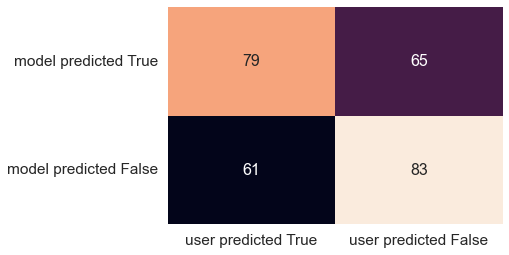

Accuracy is 0.5625


In [161]:
tmp = df_merged[df_merged["question_code"].apply(lambda x: "B8" in x)]
TP = tmp[(tmp["is_pred_correct"] == True) & (tmp["response"] == True)]
TN = tmp[(tmp["is_pred_correct"] == False) & (tmp["response"] == False)]
FN = tmp[(tmp["is_pred_correct"] == True) & (tmp["response"] == False)]
FP = tmp[(tmp["is_pred_correct"] == False) & (tmp["response"] == True)]

cm = np.array([[len(TP),len(FN)],[len(FP),len(TN)]])
cm = pd.DataFrame(cm, index=["model predicted True", "model predicted False"],
                  columns=["user predicted True", "user predicted False"])
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 16},cbar=False,fmt="g") # font size

plt.show()
acc = (len(TP)+len(TN))/(len(TP)+len(TN)+len(FP)+len(FN))
print("Accuracy is",str(acc))

#### questionnaire 9

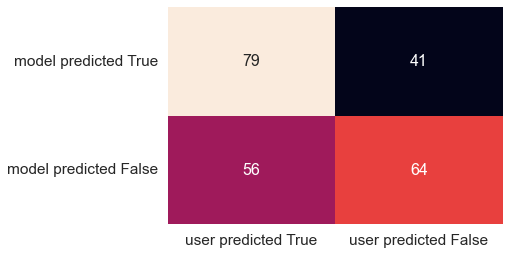

Accuracy is 0.5958333333333333


In [162]:
tmp = df_merged[df_merged["question_code"].apply(lambda x: "B9" in x)]
TP = tmp[(tmp["is_pred_correct"] == True) & (tmp["response"] == True)]
TN = tmp[(tmp["is_pred_correct"] == False) & (tmp["response"] == False)]
FN = tmp[(tmp["is_pred_correct"] == True) & (tmp["response"] == False)]
FP = tmp[(tmp["is_pred_correct"] == False) & (tmp["response"] == True)]

cm = np.array([[len(TP),len(FN)],[len(FP),len(TN)]])
cm = pd.DataFrame(cm, index=["model predicted True", "model predicted False"],
                  columns=["user predicted True", "user predicted False"])
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 16},cbar=False,fmt="g") # font size

plt.show()
acc = (len(TP)+len(TN))/(len(TP)+len(TN)+len(FP)+len(FN))
print("Accuracy is",str(acc))

#### questionnaire 10

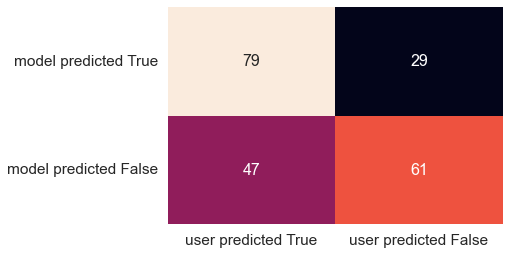

Accuracy is 0.6481481481481481


In [163]:
tmp = df_merged[df_merged["question_code"].apply(lambda x: "C1" in x)]
TP = tmp[(tmp["is_pred_correct"] == True) & (tmp["response"] == True)]
TN = tmp[(tmp["is_pred_correct"] == False) & (tmp["response"] == False)]
FN = tmp[(tmp["is_pred_correct"] == True) & (tmp["response"] == False)]
FP = tmp[(tmp["is_pred_correct"] == False) & (tmp["response"] == True)]

cm = np.array([[len(TP),len(FN)],[len(FP),len(TN)]])
cm = pd.DataFrame(cm, index=["model predicted True", "model predicted False"],
                  columns=["user predicted True", "user predicted False"])
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 16},cbar=False,fmt="g") # font size

plt.show()
acc = (len(TP)+len(TN))/(len(TP)+len(TN)+len(FP)+len(FN))
print("Accuracy is",str(acc))

#### questionnaire 11

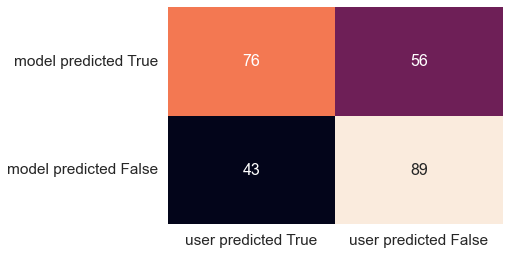

Accuracy is 0.625


In [164]:
tmp = df_merged[df_merged["question_code"].apply(lambda x: "C2" in x)]
TP = tmp[(tmp["is_pred_correct"] == True) & (tmp["response"] == True)]
TN = tmp[(tmp["is_pred_correct"] == False) & (tmp["response"] == False)]
FN = tmp[(tmp["is_pred_correct"] == True) & (tmp["response"] == False)]
FP = tmp[(tmp["is_pred_correct"] == False) & (tmp["response"] == True)]

cm = np.array([[len(TP),len(FN)],[len(FP),len(TN)]])
cm = pd.DataFrame(cm, index=["model predicted True", "model predicted False"],
                  columns=["user predicted True", "user predicted False"])
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 16},cbar=False,fmt="g") # font size

plt.show()
acc = (len(TP)+len(TN))/(len(TP)+len(TN)+len(FP)+len(FN))
print("Accuracy is",str(acc))

#### questionnaire 12

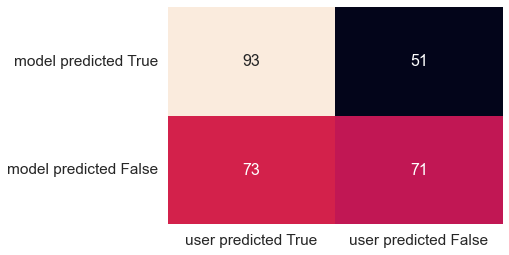

Accuracy is 0.5694444444444444


In [165]:
tmp = df_merged[df_merged["question_code"].apply(lambda x: "C3" in x)]
TP = tmp[(tmp["is_pred_correct"] == True) & (tmp["response"] == True)]
TN = tmp[(tmp["is_pred_correct"] == False) & (tmp["response"] == False)]
FN = tmp[(tmp["is_pred_correct"] == True) & (tmp["response"] == False)]
FP = tmp[(tmp["is_pred_correct"] == False) & (tmp["response"] == True)]

cm = np.array([[len(TP),len(FN)],[len(FP),len(TN)]])
cm = pd.DataFrame(cm, index=["model predicted True", "model predicted False"],
                  columns=["user predicted True", "user predicted False"])
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 16},cbar=False,fmt="g") # font size

plt.show()
acc = (len(TP)+len(TN))/(len(TP)+len(TN)+len(FP)+len(FN))
print("Accuracy is",str(acc))

### Fixed Questions

In [166]:
fixed_img_idxs = df_quest_meta["img_idx"].value_counts()[df_quest_meta["img_idx"].value_counts() == 12].index
df_quest_meta_fixed = df_quest_meta[df_quest_meta["img_idx"].isin(fixed_img_idxs)]

In [167]:
df_merged_fixed = df_merged[df_merged["img_idx"].isin(fixed_img_idxs)]

print(df_merged_fixed)

      Unnamed: 0  case     Education Education: Other          ML Experience  \
1            210   579    Highschool              NaN             Not at all   
2            200   579    Highschool              NaN             Not at all   
4            190   579    Highschool              NaN             Not at all   
5            180   579    Highschool              NaN             Not at all   
6            170   579    Highschool              NaN             Not at all   
...          ...   ...           ...              ...                    ...   
3256        2303  1660  Postgraduate              NaN  Between 1 and 3 years   
3258        2315  1660  Postgraduate              NaN  Between 1 and 3 years   
3260        2327  1660  Postgraduate              NaN  Between 1 and 3 years   
3262        2159  1660  Postgraduate              NaN  Between 1 and 3 years   
3263        2255  1660  Postgraduate              NaN  Between 1 and 3 years   

     ML Experience Usefulness Color Bli

#### All fixed

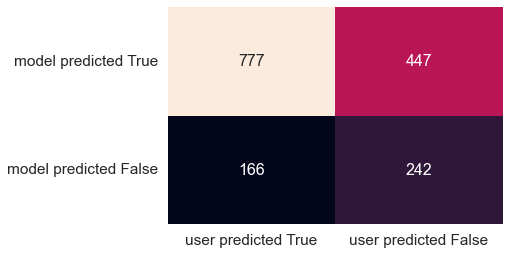

Accuracy is 0.6243872549019608


In [168]:
tmp = df_merged_fixed
TP = tmp[(tmp["is_pred_correct"] == True) & (tmp["response"] == True)]
TN = tmp[(tmp["is_pred_correct"] == False) & (tmp["response"] == False)]
FN = tmp[(tmp["is_pred_correct"] == True) & (tmp["response"] == False)]
FP = tmp[(tmp["is_pred_correct"] == False) & (tmp["response"] == True)]

cm = np.array([[len(TP),len(FN)],[len(FP),len(TN)]])
cm = pd.DataFrame(cm, index=["model predicted True", "model predicted False"],
                  columns=["user predicted True", "user predicted False"])
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 16},cbar=False,fmt="g") # font size

plt.show()
acc = (len(TP)+len(TN))/(len(TP)+len(TN)+len(FP)+len(FN))
print("Accuracy is",str(acc))

## per method

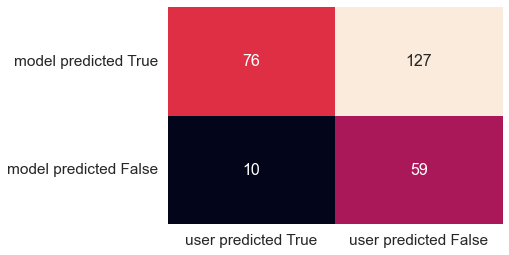

Accuracy is 0.4963235294117647 for SHAP


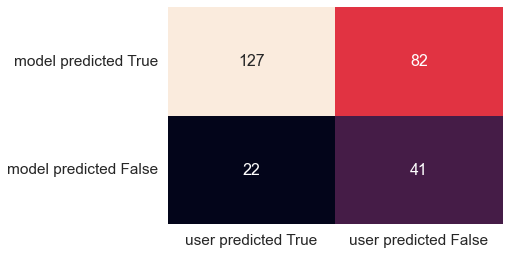

Accuracy is 0.6176470588235294 for LIME


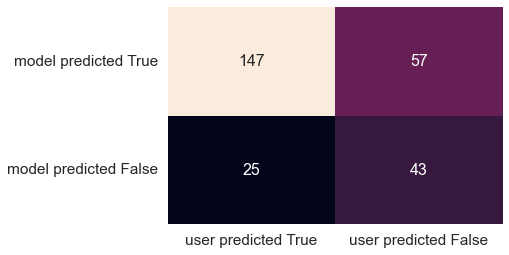

Accuracy is 0.6985294117647058 for ConfidenceScores


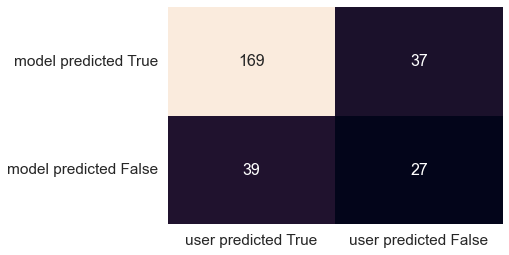

Accuracy is 0.7205882352941176 for gradCAM


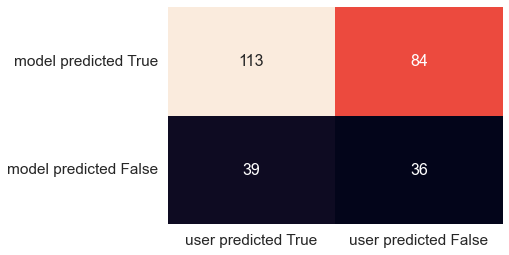

Accuracy is 0.5477941176470589 for IntegratedGradients


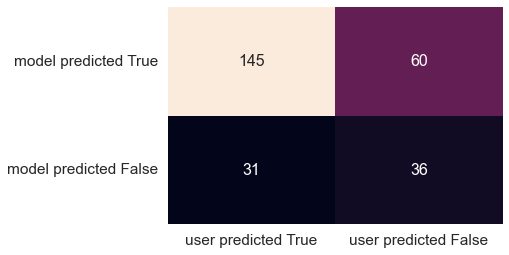

Accuracy is 0.6654411764705882 for LRP


In [169]:
methods = set(df_merged_fixed["method"].tolist())
for method in methods :
    tmp = df_merged_fixed[df_merged_fixed["method"]==method]
    TP = tmp[(tmp["is_pred_correct"] == True) & (tmp["response"] == True)]
    TN = tmp[(tmp["is_pred_correct"] == False) & (tmp["response"] == False)]
    FN = tmp[(tmp["is_pred_correct"] == True) & (tmp["response"] == False)]
    FP = tmp[(tmp["is_pred_correct"] == False) & (tmp["response"] == True)]

    cm = np.array([[len(TP),len(FN)],[len(FP),len(TN)]])
    cm = pd.DataFrame(cm, index=["model predicted True", "model predicted False"],
                  columns=["user predicted True", "user predicted False"])
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(cm, annot=True, annot_kws={"size": 16},cbar=False,fmt="g") # font size

    plt.show()
    acc = (len(TP)+len(TN))/(len(TP)+len(TN)+len(FP)+len(FN))
    print("Accuracy is",str(acc), "for", method)

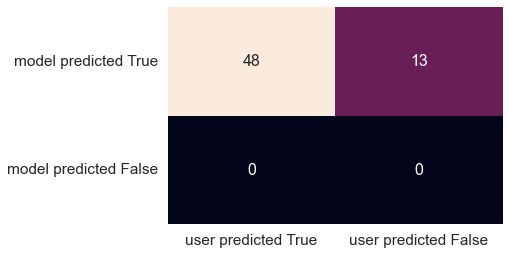

Accuracy is 0.7868852459016393 for vgg water_tower


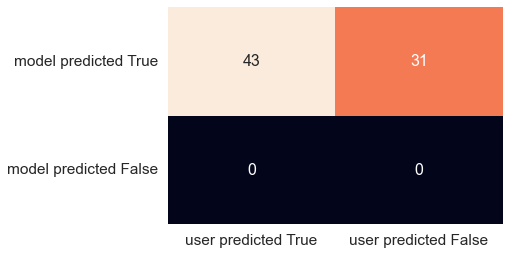

Accuracy is 0.581081081081081 for vgg custard_apple


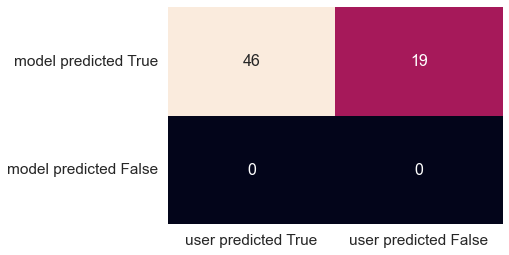

Accuracy is 0.7076923076923077 for vgg shopping_cart


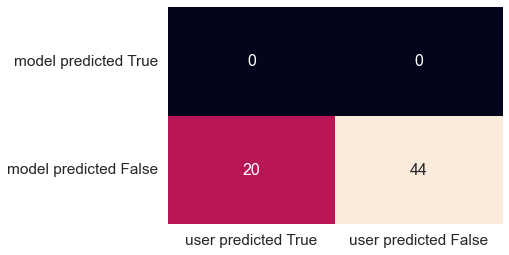

Accuracy is 0.6875 for vgg boathouse


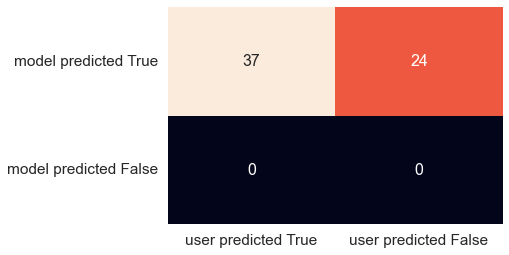

Accuracy is 0.6065573770491803 for vgg jaguar


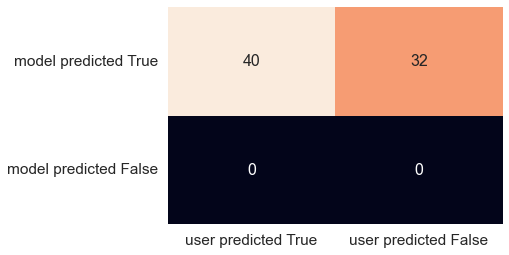

Accuracy is 0.5555555555555556 for vgg slide_rule


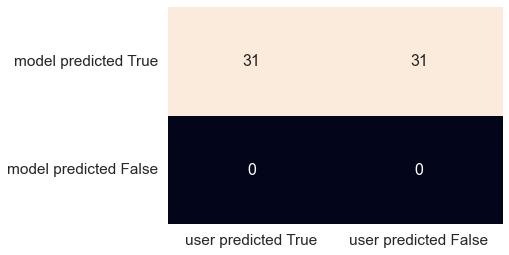

Accuracy is 0.5 for vgg coral_reef


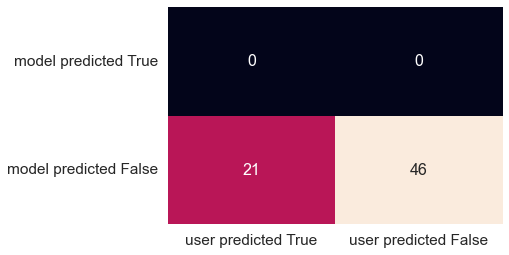

Accuracy is 0.6865671641791045 for vgg matchstick


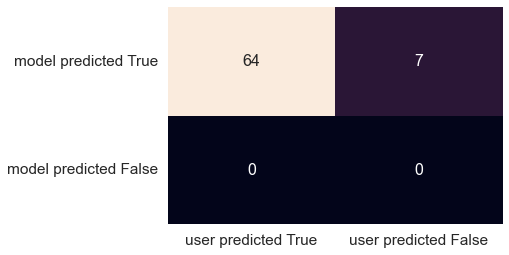

Accuracy is 0.9014084507042254 for vgg goose


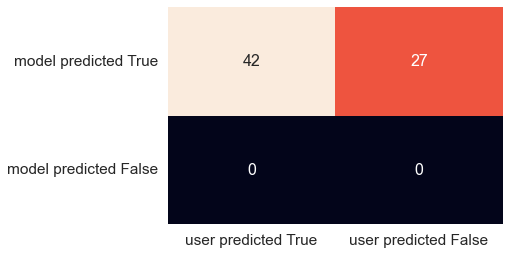

Accuracy is 0.6086956521739131 for vgg chambered_nautilus


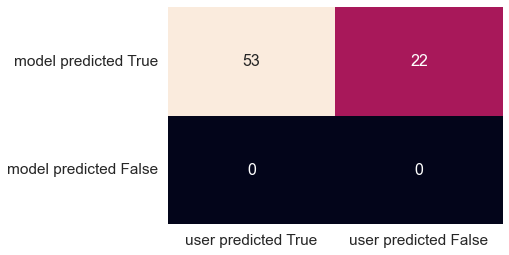

Accuracy is 0.7066666666666667 for vgg gyromitra


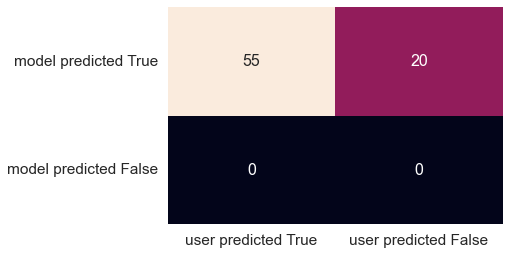

Accuracy is 0.7333333333333333 for vgg Boston_bull


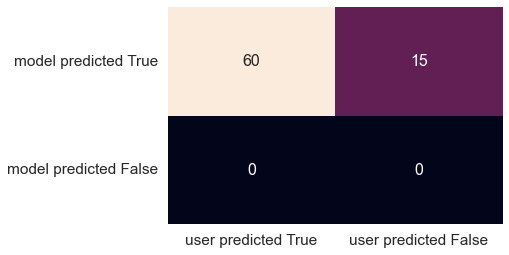

Accuracy is 0.8 for alex water_tower


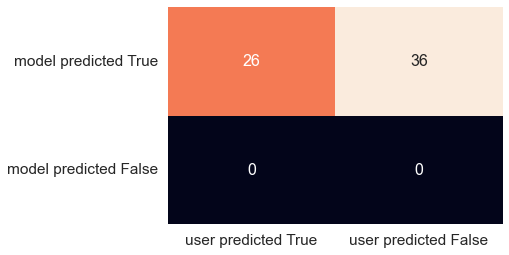

Accuracy is 0.41935483870967744 for alex custard_apple


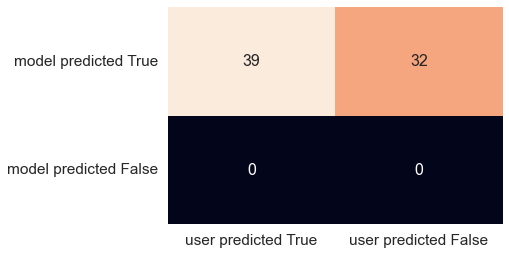

Accuracy is 0.5492957746478874 for alex shopping_cart


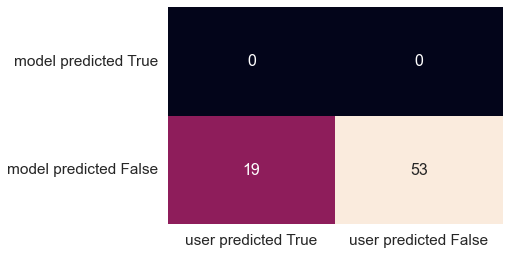

Accuracy is 0.7361111111111112 for alex boathouse


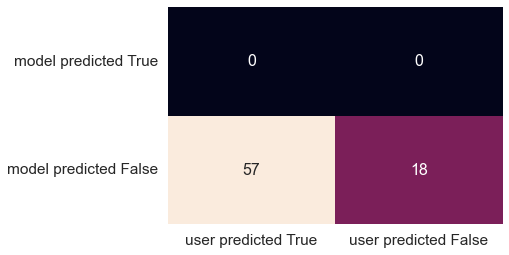

Accuracy is 0.24 for alex jaguar


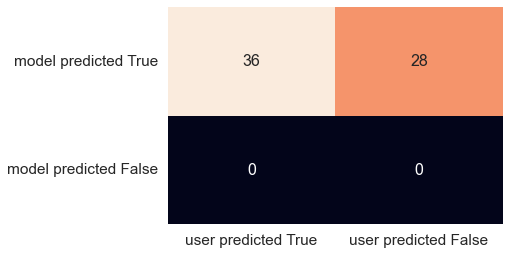

Accuracy is 0.5625 for alex slide_rule


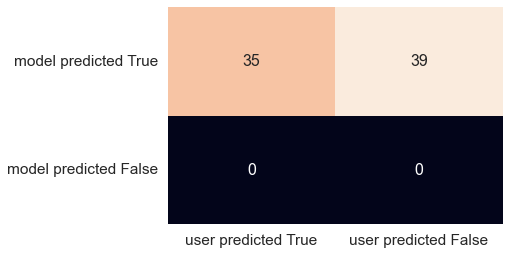

Accuracy is 0.47297297297297297 for alex coral_reef


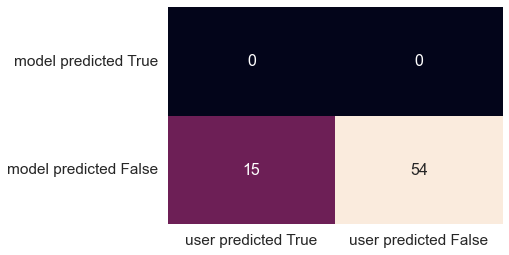

Accuracy is 0.782608695652174 for alex matchstick


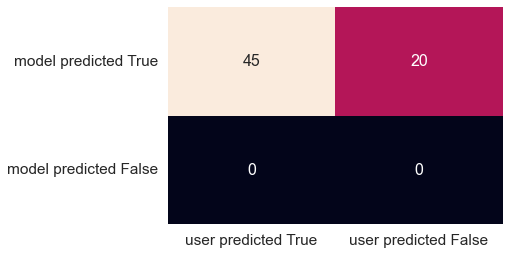

Accuracy is 0.6923076923076923 for alex goose


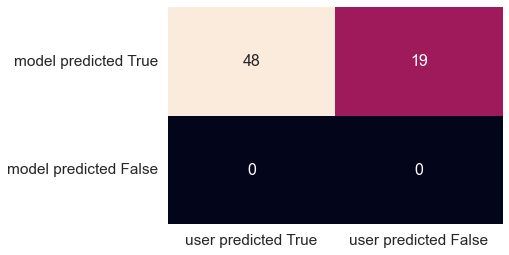

Accuracy is 0.7164179104477612 for alex chambered_nautilus


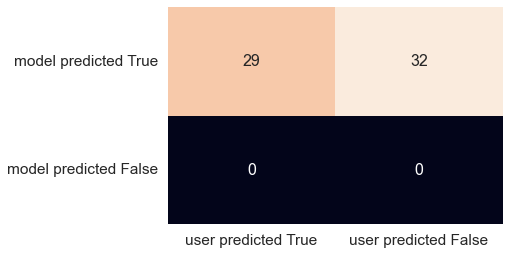

Accuracy is 0.47540983606557374 for alex gyromitra


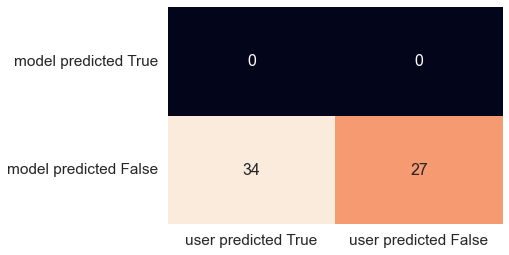

Accuracy is 0.4426229508196721 for alex Boston_bull


In [170]:
labels = set(df_merged_fixed["label"].tolist())
models = set(df_merged_fixed["model"].tolist())

for model in models :
    model_df = df_merged_fixed[df_merged_fixed["model"]==model]
    for label in labels :
        tmp = model_df[model_df["label"]==label]
        TP = tmp[(tmp["is_pred_correct"] == True) & (tmp["response"] == True)]
        TN = tmp[(tmp["is_pred_correct"] == False) & (tmp["response"] == False)]
        FN = tmp[(tmp["is_pred_correct"] == True) & (tmp["response"] == False)]
        FP = tmp[(tmp["is_pred_correct"] == False) & (tmp["response"] == True)]

        cm = np.array([[len(TP),len(FN)],[len(FP),len(TN)]])
        cm = pd.DataFrame(cm, index=["model predicted True", "model predicted False"],
                  columns=["user predicted True", "user predicted False"])
        sn.set(font_scale=1.4) # for label size
        sn.heatmap(cm, annot=True, annot_kws={"size": 16},cbar=False,fmt="g") # font size

        plt.show()
        acc = (len(TP)+len(TN))/(len(TP)+len(TN)+len(FP)+len(FN))
        print("Accuracy is",str(acc),"for", model, label)